In [85]:
import numpy as np
import scipy.stats as stats
import scipy.special as special
import pandas as pd
import chaospy as cp
import pyDOE

%matplotlib inline
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns

sns.set_style("ticks")#'whitegrid')#
#sns.set_context("talk")
sns.set_style({'axes.linewidth':0.5,
               'xtick.direction': u'in',
               'xtick.major.size': 1.,
               'xtick.minor.size': 0.5,
               'ytick.direction': u'in',               
               'ytick.major.size': 1.,
               'ytick.minor.size': 0.5})  

from scipy.stats import weibull_min
from scipy.special import gamma

Uniform distribued: $x1$ and $x2$

In [86]:
k_true = 2.
A_true = 8.
dist = cp.Weibull(shape=k_true, scale=A_true, shift=0)

### a) MC sample

A full Monte-Carlo simulation of the inputs is done ussing a reduced variance sampling method.

"K"     Korobov             
"R"     (Pseudo-)Random     
"L"     Latin hypercube     
"S"     Sobol               
"H"     Halton              
"M"     Hammersley          

The input sample is propagated through the model

In [87]:
np.random.seed(1)
N = 100
rule='R'
sample_inputs = dist.sample(size=N,rule=rule)
k_hat, _, A_hat = stats.weibull_min.fit(sample_inputs,floc=0.)

N = int(1e3)
rule='R'
sample_inputs_b = dist.sample(size=N,rule=rule)
k_hat_b, _, A_hat_b = stats.weibull_min.fit(sample_inputs_b,floc=0.)

N = int(1e4)
rule='R'
sample_inputs_c = dist.sample(size=N,rule=rule)
k_hat_c, _, A_hat_c = stats.weibull_min.fit(sample_inputs_c,floc=0.)

In [88]:
def fformat(f, prec=2):
    s = "%.*f"%(prec, f)
    # add 1 to digits as 1 is taken by sign +/-
    return ' '+"%s"%(s)

In [89]:
df = pd.DataFrame(columns=['True','1e2','1e3','1e4'],
             index=['A','k'],
             data=np.array([[A_true,A_hat,A_hat_b,A_hat_c],[k_true,k_hat,k_hat_b,k_hat_c]]))

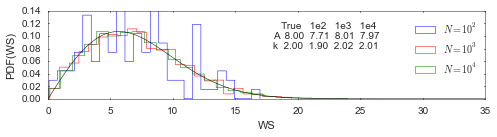

In [97]:
fig = plt.figure(figsize=[7,2])
ax = fig.add_subplot(1,1,1)

x_plot = np.linspace(0,35,500)
ax.plot(x_plot,dist.pdf(x_plot),'-k',lw=0.5)

bins=25

ax.hist(sample_inputs,
        bins=bins,#np.linspace(-0.2,.2,50),
        histtype='step',
        color='blue',
        lw=0.5,
        normed=True,
        cumulative=False,
        label=r'$N=10^2$')

ax.hist(sample_inputs_b,
        bins=bins,#np.linspace(-0.2,.2,50),
        histtype='step',
        color='red',
        lw=0.5,
        normed=True,
        cumulative=False,
        label=r'$N=10^3$')

ax.hist(sample_inputs_c,
        bins=bins,#np.linspace(-0.2,.2,50),
        histtype='step',
        color='green',
        lw=0.5,
        normed=True,
        cumulative=False,
        label=r'$N=10^4$')

ax.annotate(df.to_string(col_space=0,justify='right',float_format =fformat),(18,0.08))
ax.set_ylim([0,0.14])
ax.set_xlabel('WS')
ax.set_ylabel('PDF(WS)')
ax.legend(loc='upper right')

fig.tight_layout()
fig.savefig('Figures/0_Statistical_Uncertainty.pdf')